In [81]:
%config Completer.use_jedi = False

In [66]:
import pandas as pd

In [67]:
df = pd.read_csv('house.csv')

In [111]:
df.columns[df.isnull().sum()>1]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'],
      dtype='object')

In [77]:
df['LotFrontage'].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

<AxesSubplot:>

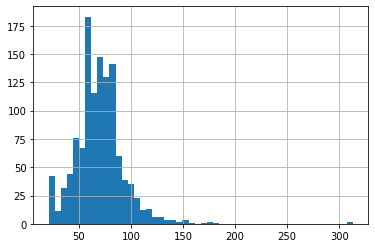

In [76]:
df.LotFrontage.hist(bins=50)

In [78]:
random_samples = df['LotFrontage'].dropna().sample(df['LotFrontage'].isnull().sum(0),random_state=0)

In [85]:
random_samples.index = df[df['LotFrontage'].isnull()].index

In [86]:
random_samples.index

Int64Index([   7,   12,   14,   16,   24,   31,   42,   43,   50,   64,
            ...
            1407, 1417, 1419, 1423, 1424, 1429, 1431, 1441, 1443, 1446],
           dtype='int64', length=259)

In [92]:
df['Lot_Random'] = df['LotFrontage']
df.loc[df['LotFrontage'].isnull(),'Lot_Random'] = random_samples

In [108]:
df['Lot_median'] = df.LotFrontage.fillna(df['LotFrontage'].median())

In [101]:
import matplotlib.pyplot as plt
%matplotlib inline

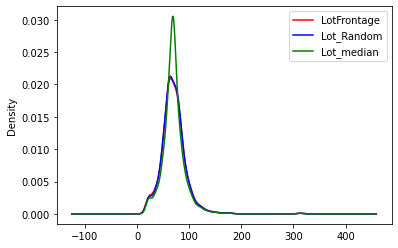

In [110]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['LotFrontage'].plot(kind='kde',ax=ax,color='red')
df['Lot_Random'].plot(kind='kde',ax=ax,color='blue')
df['Lot_median'].plot(kind='kde',ax=ax,color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

## Observation
 when we have many unique values in a feature 
 we can handle missing values with random Sampling technique without distorting the distribution